# Amazon: Brand Exploration
Here, we look at a single brand at a time.

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 6]

In [57]:
df = pd.read_csv("../output/amazon/Not Your Mother's_Naturals.csv")

In [58]:
df

,Unnamed: 0,Product,Rating,Title,Review
0,0,Not Your Mother's Naturals Curl Definition Sha...,4.0 out of 5 stars,good for low porosity curls,Ok 1. for ppl saying “description says 16 bott...
1,1,Not Your Mother's Naturals Curl Definition Sha...,2.0 out of 5 stars,"First time use - good results, bad price",***Edit***I'm editing my original review becau...
2,2,Not Your Mother's Naturals Curl Definition Sha...,1.0 out of 5 stars,"Description says 16 bottles, but only got 2",This description said you would get 8 shampoos...
3,3,Not Your Mother's Naturals Curl Definition Sha...,5.0 out of 5 stars,Great product and great value!!,I absolutely love this shampoo and conditioner...
4,4,Not Your Mother's Naturals Curl Definition Sha...,4.0 out of 5 stars,Love the product but the pumps could be A LOT ...,I have wavy hair and I have been embracing the...
...,...,...,...,...,...
1077,128,Not Your Mother's Naturals Curl Definition Sha...,2.0 out of 5 stars,Does not moisturize,I did not care for the smell and this actually...
1078,129,Not Your Mother's Naturals Curl Definition Sha...,5.0 out of 5 stars,My favorite hair conditioner,I have not found another that detangles my hai...
1079,130,Not Your Mother's Naturals Curl Definition Sha...,1.0 out of 5 stars,Rancid shampoo and plastic conditioner,"I wish I was allowed to return this item, but ..."
1080,131,Not Your Mother's Naturals Curl Definition Sha...,2.0 out of 5 stars,Terrible for my Hair,"I have other products from NYM’s that I love, ..."


## Data cleaning

In [59]:
df = df[df.Rating.str.contains("stars")]

In [60]:
df["RatingNumeric"]  = df.Rating.str.split(expand=True)[0]

<ipython-input-60-63b6939fab73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RatingNumeric"]  = df.Rating.str.split(expand=True)[0]


In [61]:
df["Review"] = df["Review"].str.lower()

<ipython-input-61-ecebcb918d5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Review"] = df["Review"].str.lower()


In [62]:
df

,Unnamed: 0,Product,Rating,Title,Review,RatingNumeric
0,0,Not Your Mother's Naturals Curl Definition Sha...,4.0 out of 5 stars,good for low porosity curls,ok 1. for ppl saying “description says 16 bott...,4.0
1,1,Not Your Mother's Naturals Curl Definition Sha...,2.0 out of 5 stars,"First time use - good results, bad price",***edit***i'm editing my original review becau...,2.0
2,2,Not Your Mother's Naturals Curl Definition Sha...,1.0 out of 5 stars,"Description says 16 bottles, but only got 2",this description said you would get 8 shampoos...,1.0
3,3,Not Your Mother's Naturals Curl Definition Sha...,5.0 out of 5 stars,Great product and great value!!,i absolutely love this shampoo and conditioner...,5.0
4,4,Not Your Mother's Naturals Curl Definition Sha...,4.0 out of 5 stars,Love the product but the pumps could be A LOT ...,i have wavy hair and i have been embracing the...,4.0
...,...,...,...,...,...,...
1077,128,Not Your Mother's Naturals Curl Definition Sha...,2.0 out of 5 stars,Does not moisturize,i did not care for the smell and this actually...,2.0
1078,129,Not Your Mother's Naturals Curl Definition Sha...,5.0 out of 5 stars,My favorite hair conditioner,i have not found another that detangles my hai...,5.0
1079,130,Not Your Mother's Naturals Curl Definition Sha...,1.0 out of 5 stars,Rancid shampoo and plastic conditioner,"i wish i was allowed to return this item, but ...",1.0
1080,131,Not Your Mother's Naturals Curl Definition Sha...,2.0 out of 5 stars,Terrible for my Hair,"i have other products from nym’s that i love, ...",2.0


## Exploratory data viz

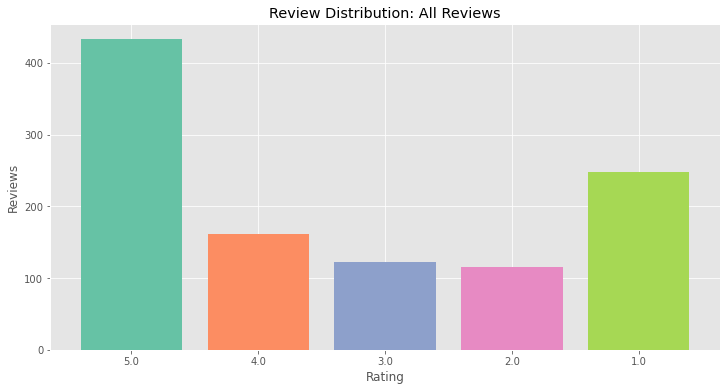

In [80]:
all_counts = df.RatingNumeric.value_counts().sort_index(ascending=False)

plt.bar([i for i in range(5)], list(all_counts), color=sns.color_palette("Set2")[:5])
plt.xlabel("Rating")
plt.ylabel("Reviews")
plt.title("Review Distribution: All Reviews")

plt.xticks([i for i in range(5)], list(all_counts.keys()))

plt.show()

In [94]:
def fill_counts(col, possible_values, asc=False):
    # create counts based on column
    cts = col.value_counts()
    
    
    # get missing values
    missing = [x for x in possible_values if x not in list(cts.keys())]
    
    if len(missing) > 0:
        missing_cts = pd.Series([0] * len(missing), index=missing)
        cts = cts.append(missing_cts)
        
    return(cts.sort_index(ascending=asc))
        
fill_counts(df[df.Review.str.contains("coarse", na=False)].RatingNumeric, ['1.0','2.0','3.0','4.0','5.0'])        

5.0    2
4.0    1
3.0    0
2.0    3
1.0    0
dtype: int64

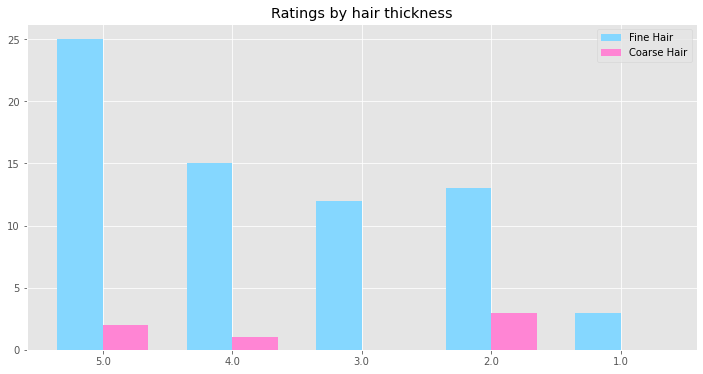

In [96]:
fine_counts = fill_counts(df[df.Review.str.contains("fine", na=False)].RatingNumeric, ['1.0','2.0','3.0','4.0','5.0'])
coarse_counts = fill_counts(df[df.Review.str.contains("coarse", na=False)].RatingNumeric, ['1.0','2.0','3.0','4.0','5.0'])

type(coarse_counts)

ind = np.arange(5)
width = 0.35

plt.bar(ind, list(fine_counts), width, label='Fine Hair', color="#85d7ff")
plt.bar(ind + width, list(coarse_counts), width, label='Coarse Hair', color="#ff85d4")

plt.title('Ratings by hair thickness')

plt.xticks(ind + width / 2, list(fine_counts.keys()))
plt.legend(loc='best')
plt.show()

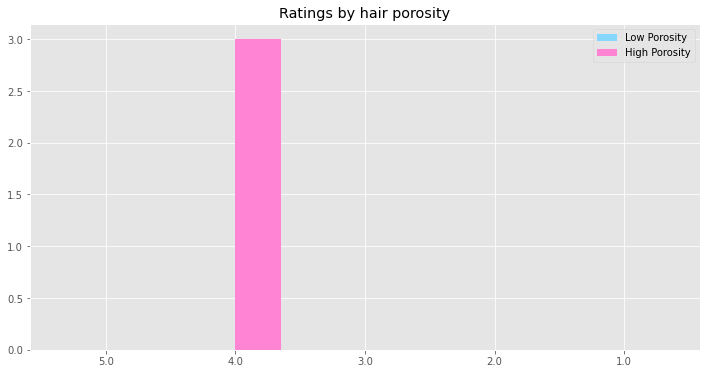

In [97]:
low_counts = fill_counts(df[df.Review.str.contains("low porosity", na=False)].RatingNumeric, ['1.0','2.0','3.0','4.0','5.0'])
high_counts = fill_counts(df[df.Review.str.contains("high porosity", na=False)].RatingNumeric, ['1.0','2.0','3.0','4.0','5.0'])

ind = np.arange(5)
width = 0.35

plt.bar(ind, list(low_counts), width, label='Low Porosity', color="#85d7ff")
plt.bar(ind + width, list(high_counts), width, label='High Porosity', color="#ff85d4")

plt.title('Ratings by hair porosity')

plt.xticks(ind + width / 2, list(low_counts.keys()))
plt.legend(loc='best')
plt.show()

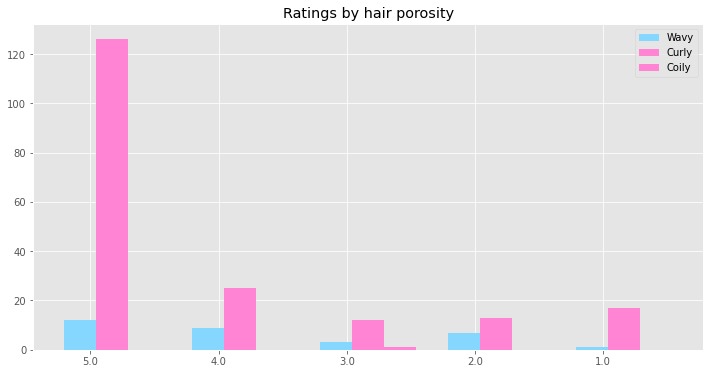

In [102]:
wavy_counts = fill_counts(df[df.Review.str.contains("2a|2b|2c|wavy", na=False)].RatingNumeric, ['1.0','2.0','3.0','4.0','5.0'])
curly_counts = fill_counts(df[df.Review.str.contains("3a|3b|3c|type 3|curls|curly hair", na=False)].RatingNumeric, ['1.0','2.0','3.0','4.0','5.0'])
coily_counts = fill_counts(df[df.Review.str.contains("4a|4b|4c|coily|type 4", na=False)].RatingNumeric, ['1.0','2.0','3.0','4.0','5.0'])

ind = np.arange(5)
width = 0.25

plt.bar(ind, list(wavy_counts), width, label='Wavy', color="#85d7ff")
plt.bar(ind + width, list(curly_counts), width, label='Curly', color="#ff85d4")
plt.bar(ind + width*2, list(coily_counts), width, label='Coily', color="#ff85d4")

plt.title('Ratings by hair texture')

plt.xticks(ind + width / 3, list(wavy_counts.keys()))
plt.legend(loc='best')
plt.show()

In [70]:
df[df.Review.str.contains("frizz", na=False)].RatingNumeric.value_counts()

5.0    18
1.0     9
4.0     5
3.0     5
2.0     4
Name: RatingNumeric, dtype: int64

In [71]:
df[df.Review.str.contains("protein", na=False)].RatingNumeric.value_counts()

4.0    6
5.0    1
Name: RatingNumeric, dtype: int64

In [72]:
df[df.Review.str.contains("dry", na=False)].RatingNumeric.value_counts()

1.0    36
5.0    33
2.0    20
4.0    11
3.0     5
Name: RatingNumeric, dtype: int64

In [104]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

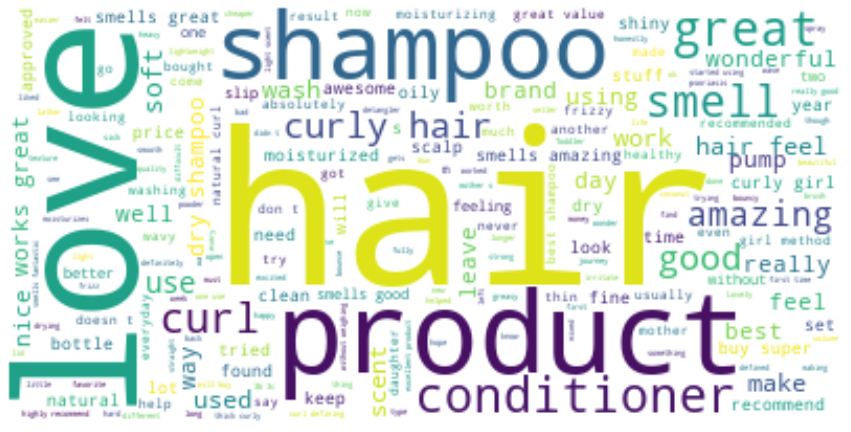

In [117]:
positive_text = " ".join(str(i) for i in df[df.RatingNumeric == "5.0"].Review) + " ".join(str(i) for i in df[df.RatingNumeric == "5.0"].Title)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive_text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

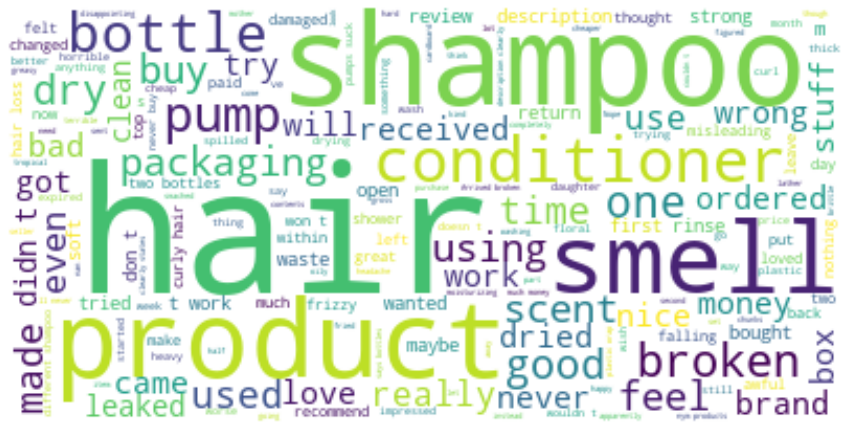

In [116]:
negative_text = " ".join(str(i) for i in df[df.RatingNumeric == "1.0"].Review) + " ".join(str(i) for i in df[df.RatingNumeric == "1.0"].Title)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative_text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()